## Supervsed Machine Learning

Unsupervised machine learning involves training a model on an unlabeled dataset.

In [7]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# load dataset
data = pd.read_csv(filepath_or_buffer='/home/jumashafara/work/dataidea/students/voila/datasets/music.csv')

In [15]:
# data2 = pd.get_dummies(data=data, drop_first=True).astype(dtype='int')
data2 = data.drop('genre', axis=1)

In [16]:
data2.head(n=5)

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data2)

/home/jumashafara/venvs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [27]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [28]:
data2['cluster'] = kmeans.labels_

In [29]:
data2

,age,gender,cluster
0,20,1,1
1,23,1,1
2,25,1,1
3,26,1,1
4,29,1,0
5,30,1,0
6,31,1,0
7,33,1,0
8,37,1,0
9,20,0,1


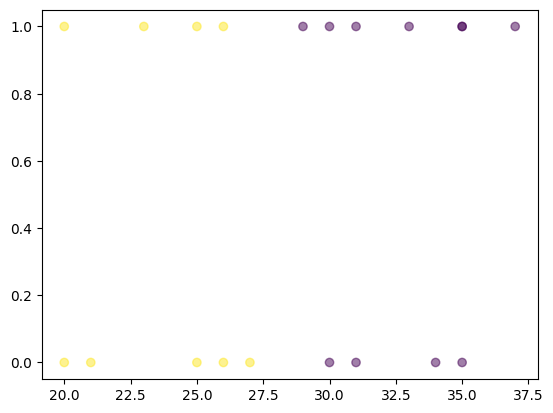

In [30]:
plt.scatter(data2['  age '], data2.gender, c=data2.cluster, cmap='viridis', alpha=0.5)

In [32]:
dataframe = pd.read_csv(filepath_or_buffer='/home/jumashafara/work/dataidea/students/voila/datasets/titanic3.csv')

In [35]:
dataframe.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [36]:
dataframe.drop(columns=['name', 'ticket', 'cabin', 'body', 'home.dest', 'embarked'], inplace=True)

In [38]:
dataframe.drop('boat', axis=1, inplace=True)

In [43]:
dataframe.drop([1309], inplace=True)

In [46]:
dataframe['age'].fillna(dataframe.age.median(), inplace=True)
dataframe['fare'].fillna(dataframe.fare.median(), inplace=True)
dataframe['sex'] = dataframe.sex.map({'male': 1, 'female': 0})

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe)

In [86]:
kmeans = KMeans(n_clusters=2, random_state=56)
kmeans.fit(scaled_data)

/home/jumashafara/venvs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=56)

In [87]:
dataframe['cluster'] = kmeans.labels_

In [55]:
dataframe.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'cluster'],
      dtype='object')

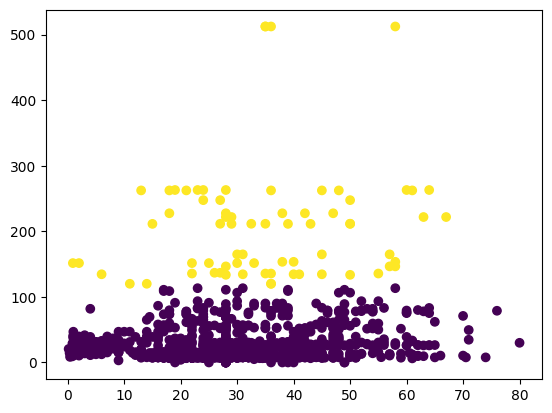

In [89]:
plt.scatter(dataframe.age, dataframe.fare, c=dataframe.cluster)

In [79]:
dataframe.tail(n=20)

,pclass,survived,sex,age,sibsp,parch,fare,cluster
1289,3.0,0.0,1,21.0,1.0,0.0,6.4958,0
1290,3.0,1.0,0,47.0,1.0,0.0,7.0000,0
1291,3.0,0.0,1,28.0,0.0,0.0,8.7125,0
1292,3.0,0.0,1,28.0,0.0,0.0,7.5500,0
1293,3.0,0.0,1,28.0,0.0,0.0,8.0500,0
1294,3.0,0.0,1,28.5,0.0,0.0,16.1000,0
1295,3.0,0.0,1,21.0,0.0,0.0,7.2500,0
1296,3.0,0.0,1,27.0,0.0,0.0,8.6625,0
1297,3.0,0.0,1,28.0,0.0,0.0,7.2500,0
1298,3.0,0.0,1,36.0,0.0,0.0,9.5000,0
